/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


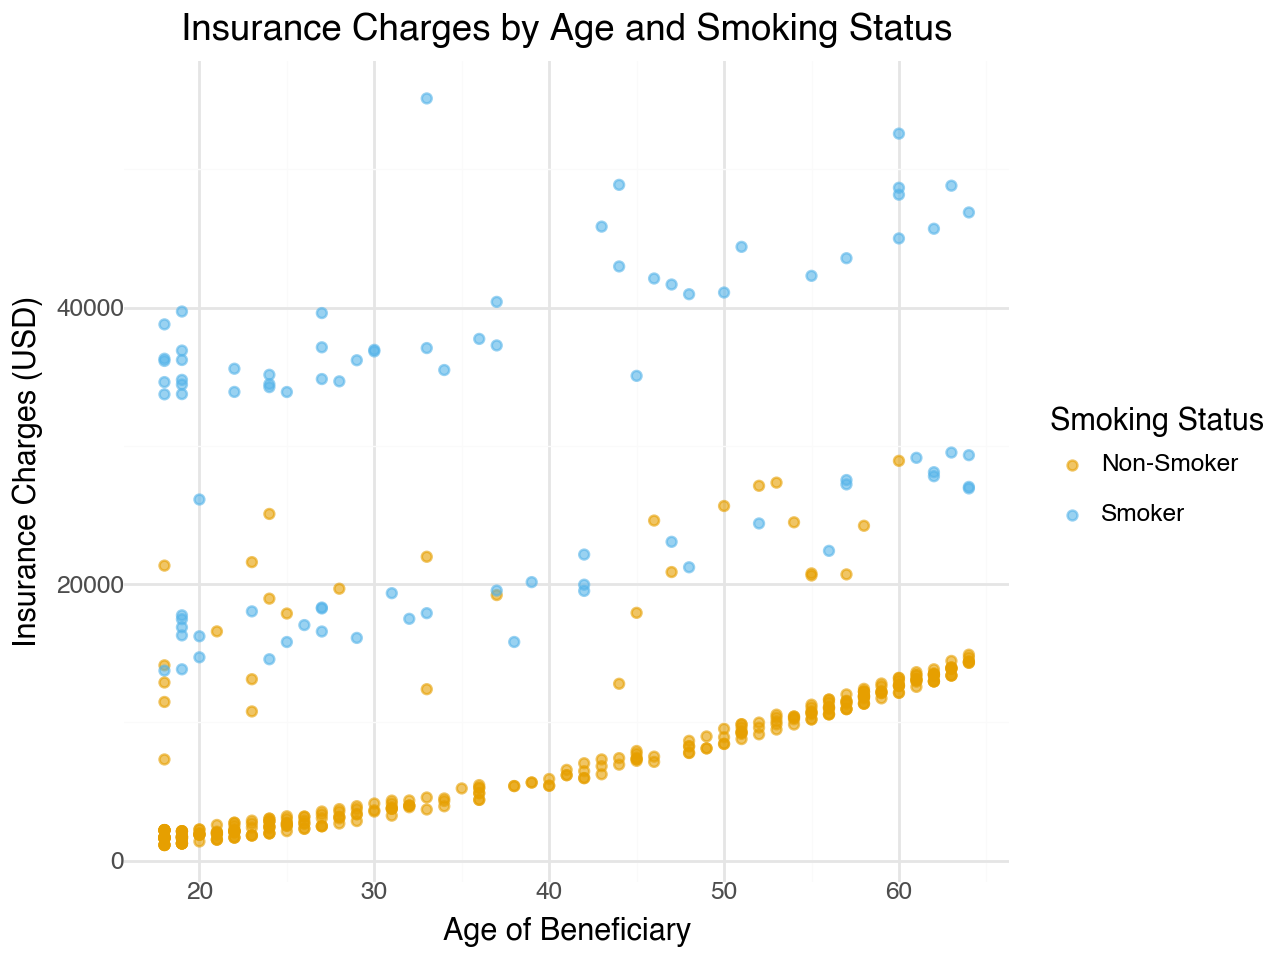

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [33]:
from plotnine import *
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()

Part One: Data Exploration

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,False,True,False,False,True
1,33,22.705,21984.47061,True,False,True,False,False
2,32,28.880,3866.85520,True,False,True,False,False
3,31,25.740,3756.62160,False,False,False,True,False
4,60,25.840,28923.13692,False,False,True,False,False


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


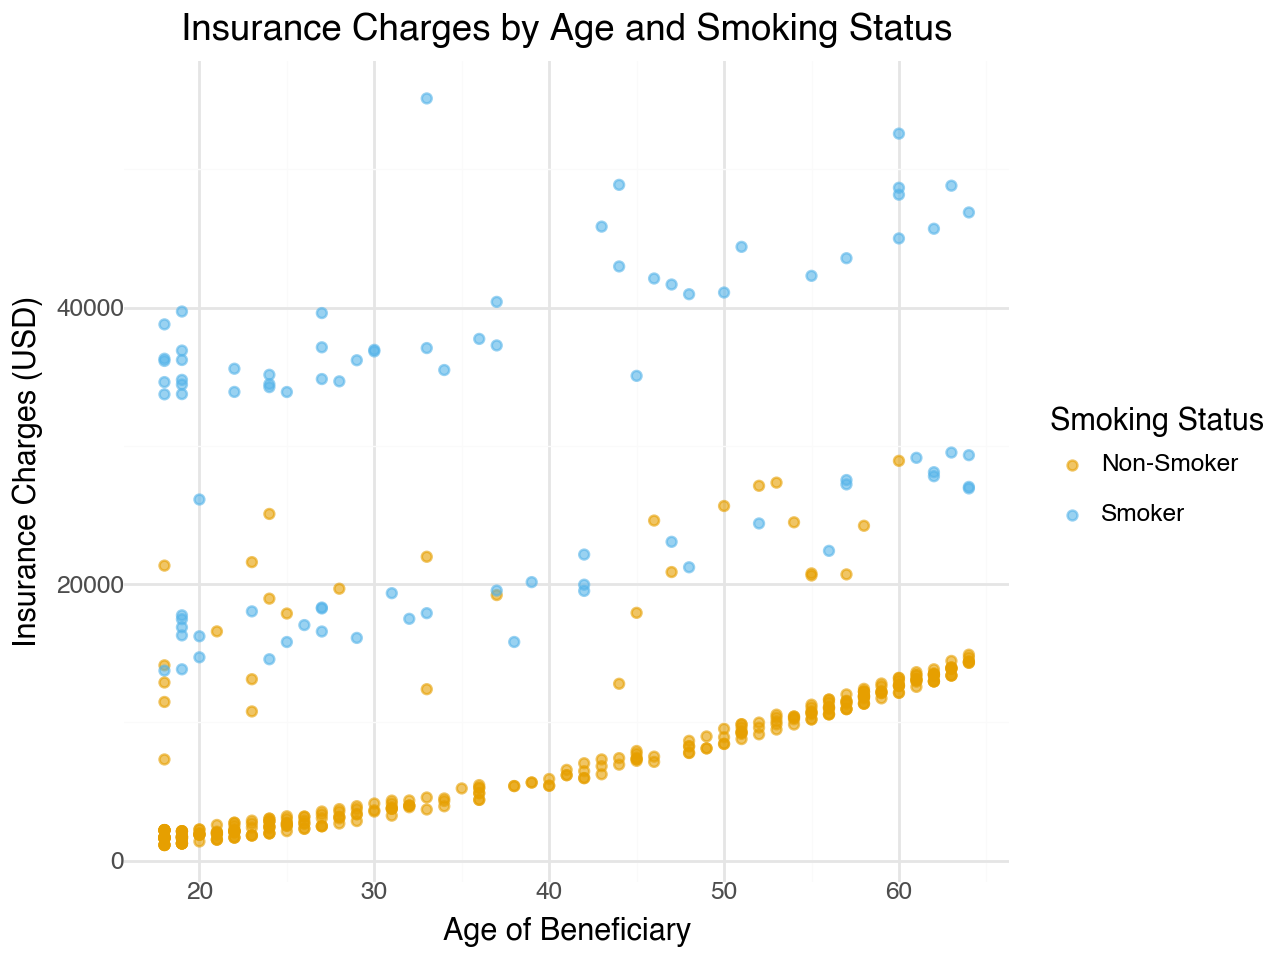

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [34]:
df = pd.read_csv('/Users/avanti/OneDrive/MASTERS/GSB544-Computing and Machine Learning/Labs/Lab Data/insurance_costs_1.csv')

# Drop rows with missing values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Convert categorical variables to dummy variables
# This will one-hot encode the 'sex', 'smoker', and 'region' columns
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the first few rows of the cleaned dataset
df.head()


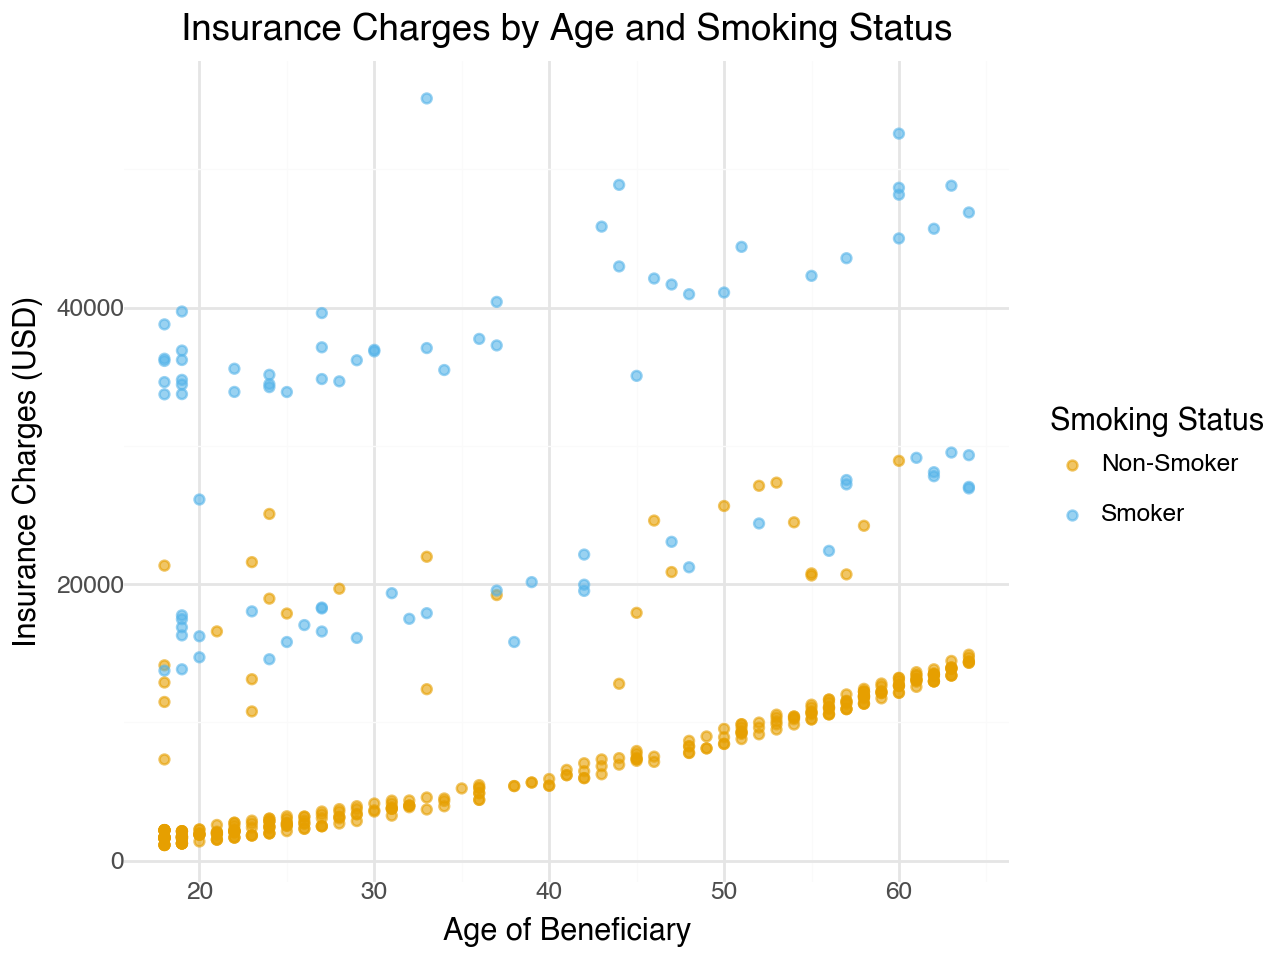

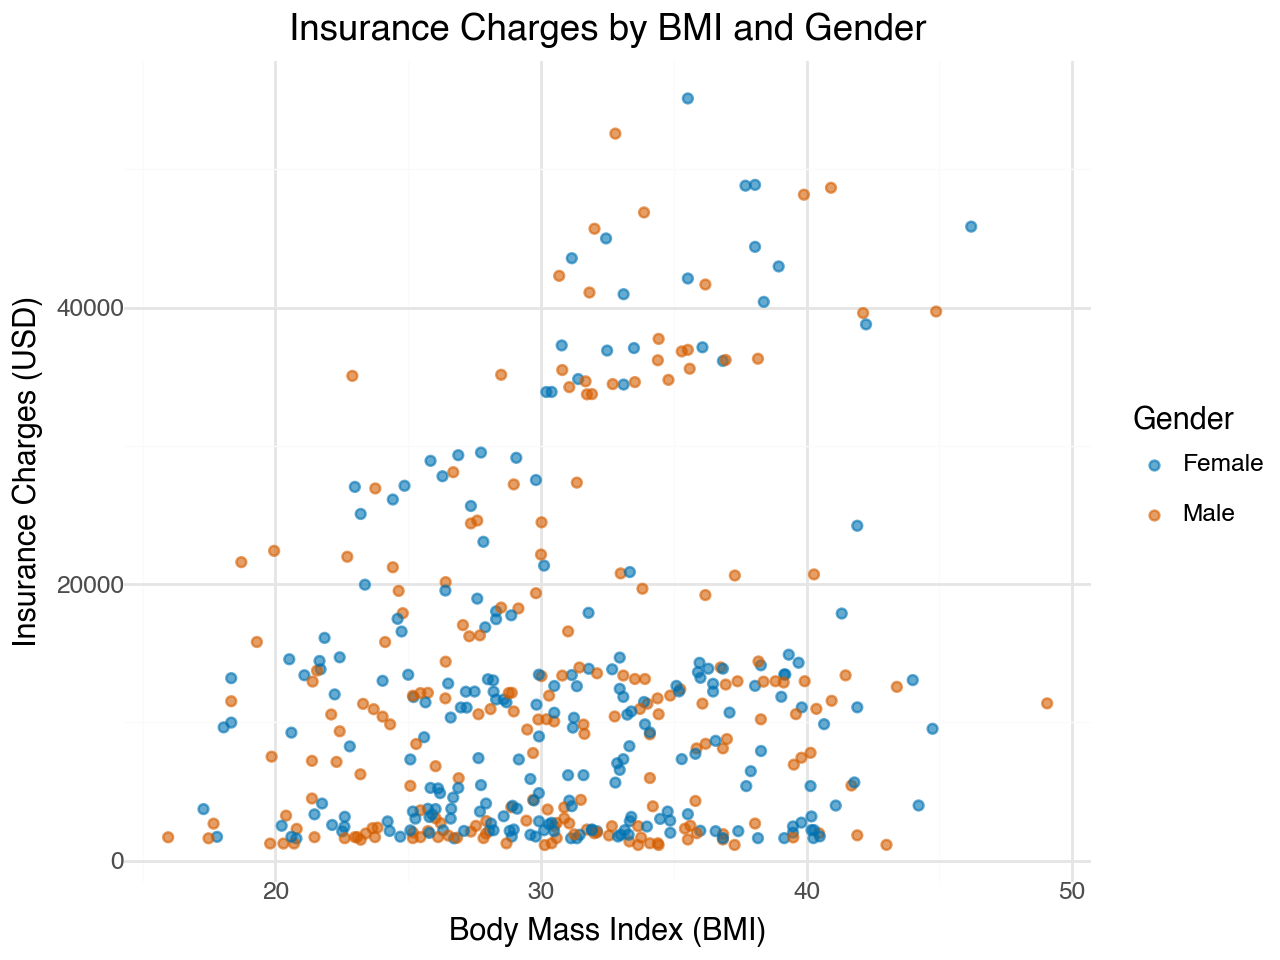

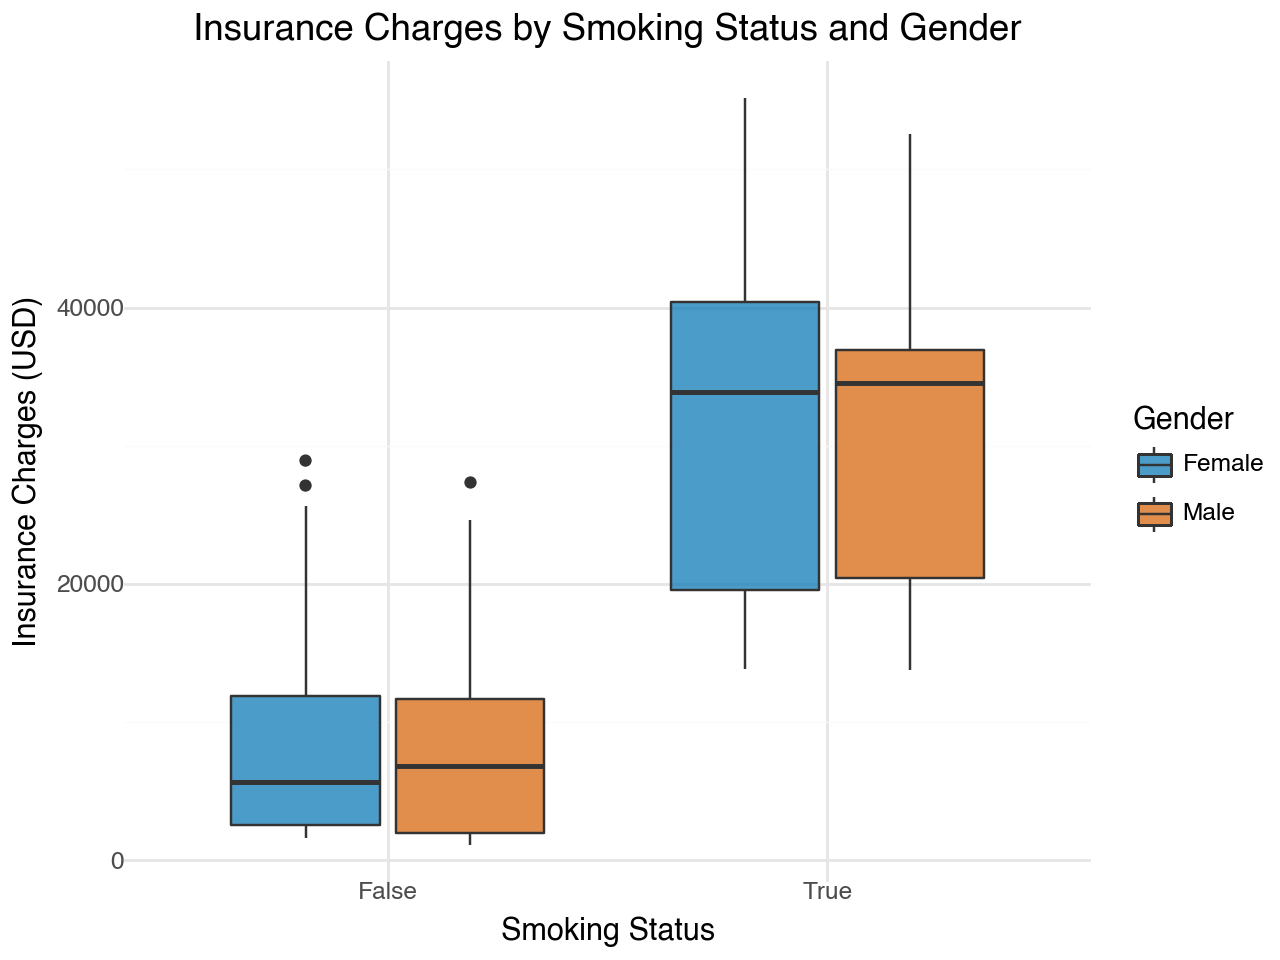

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


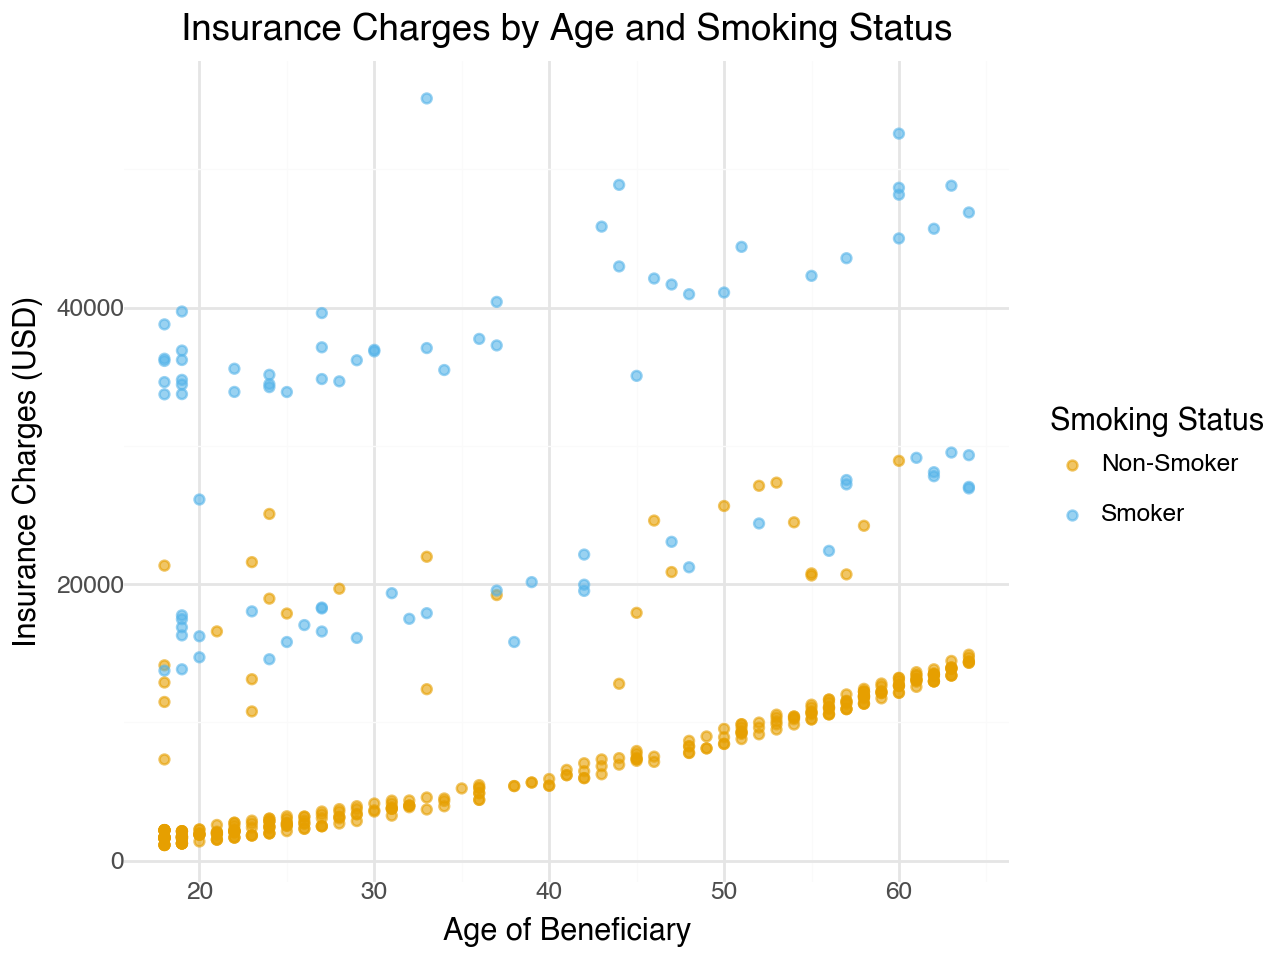

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


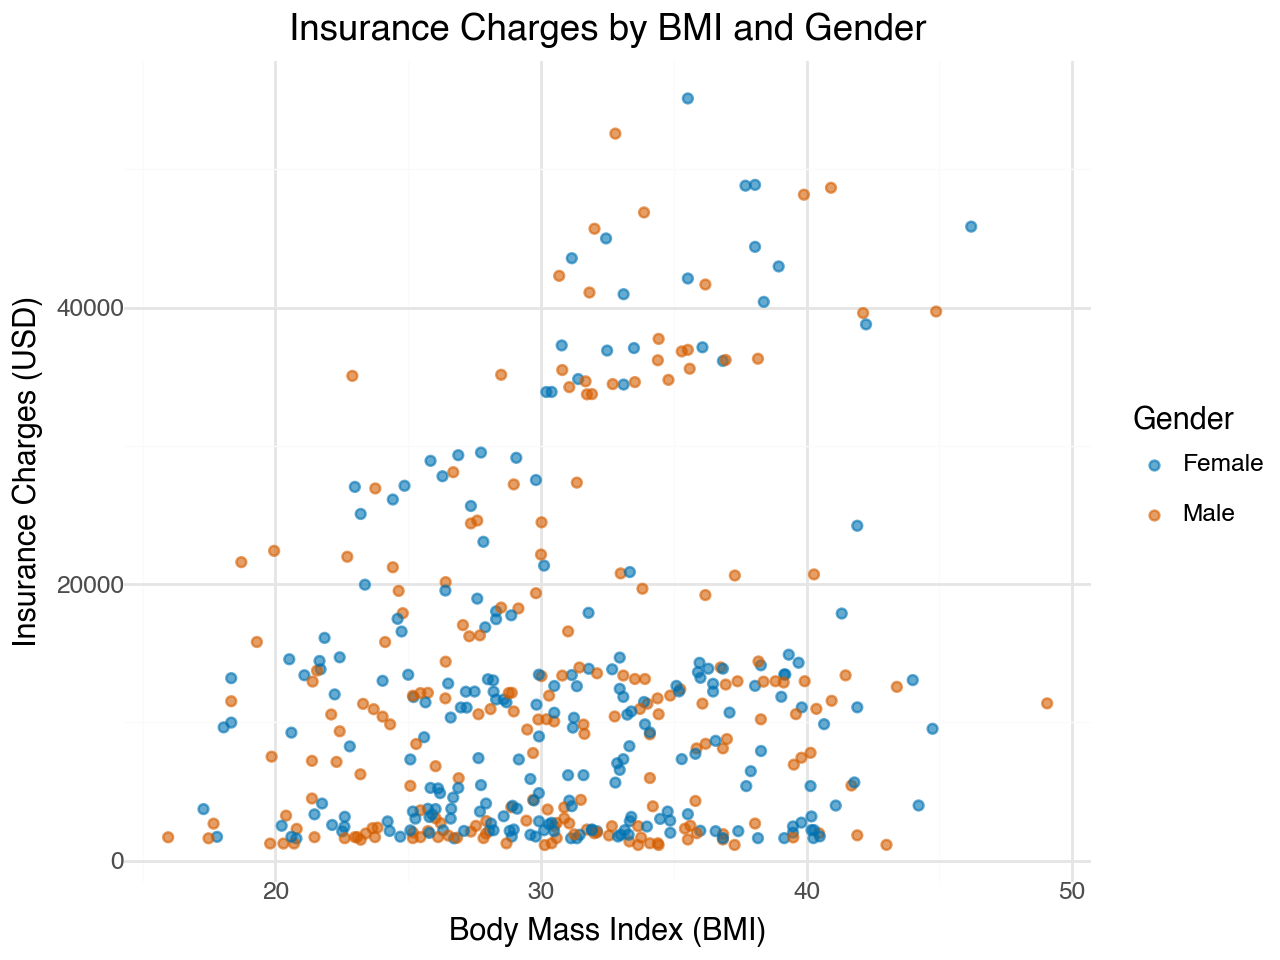

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


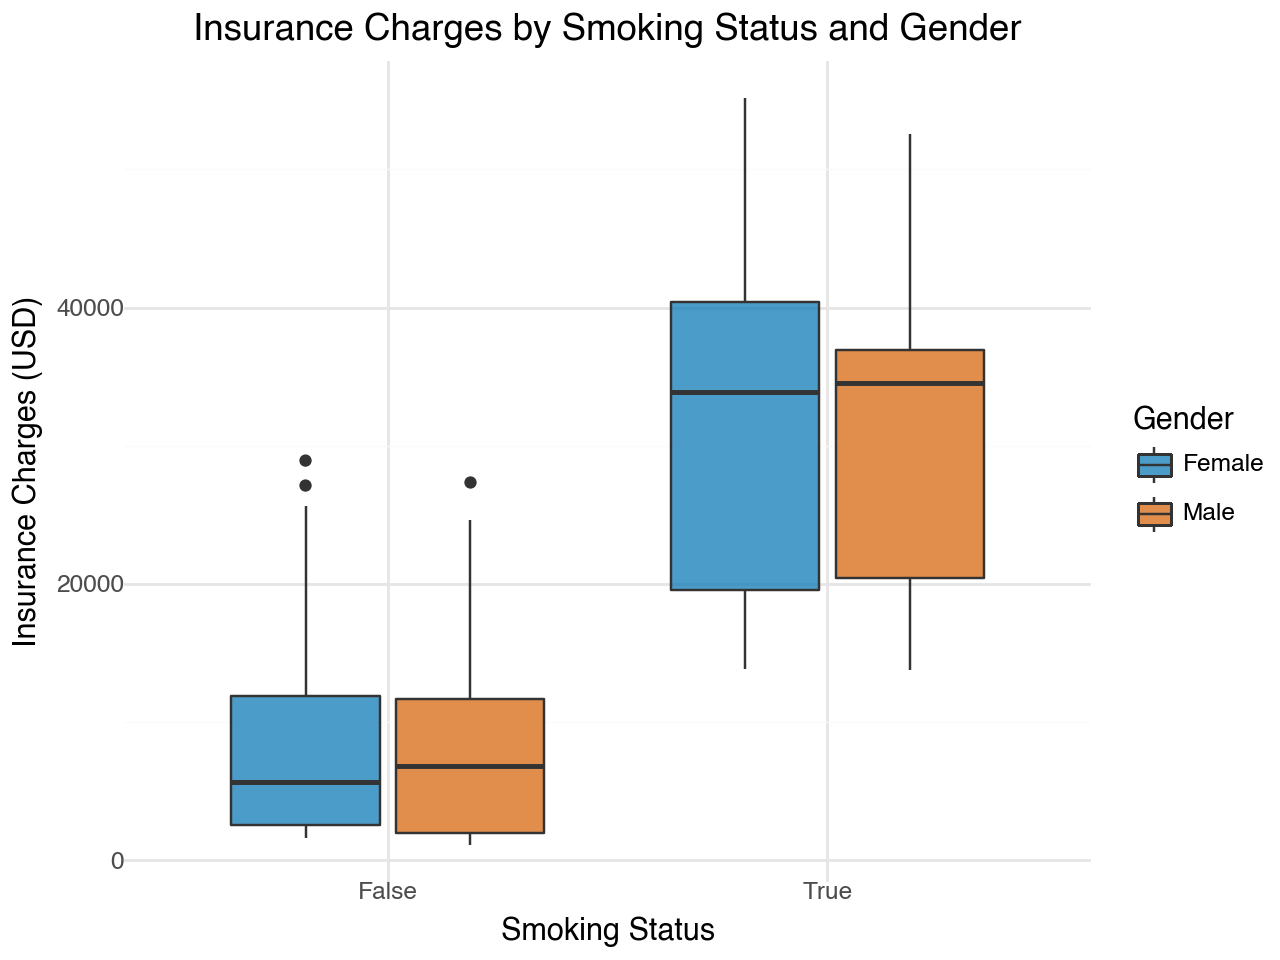

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


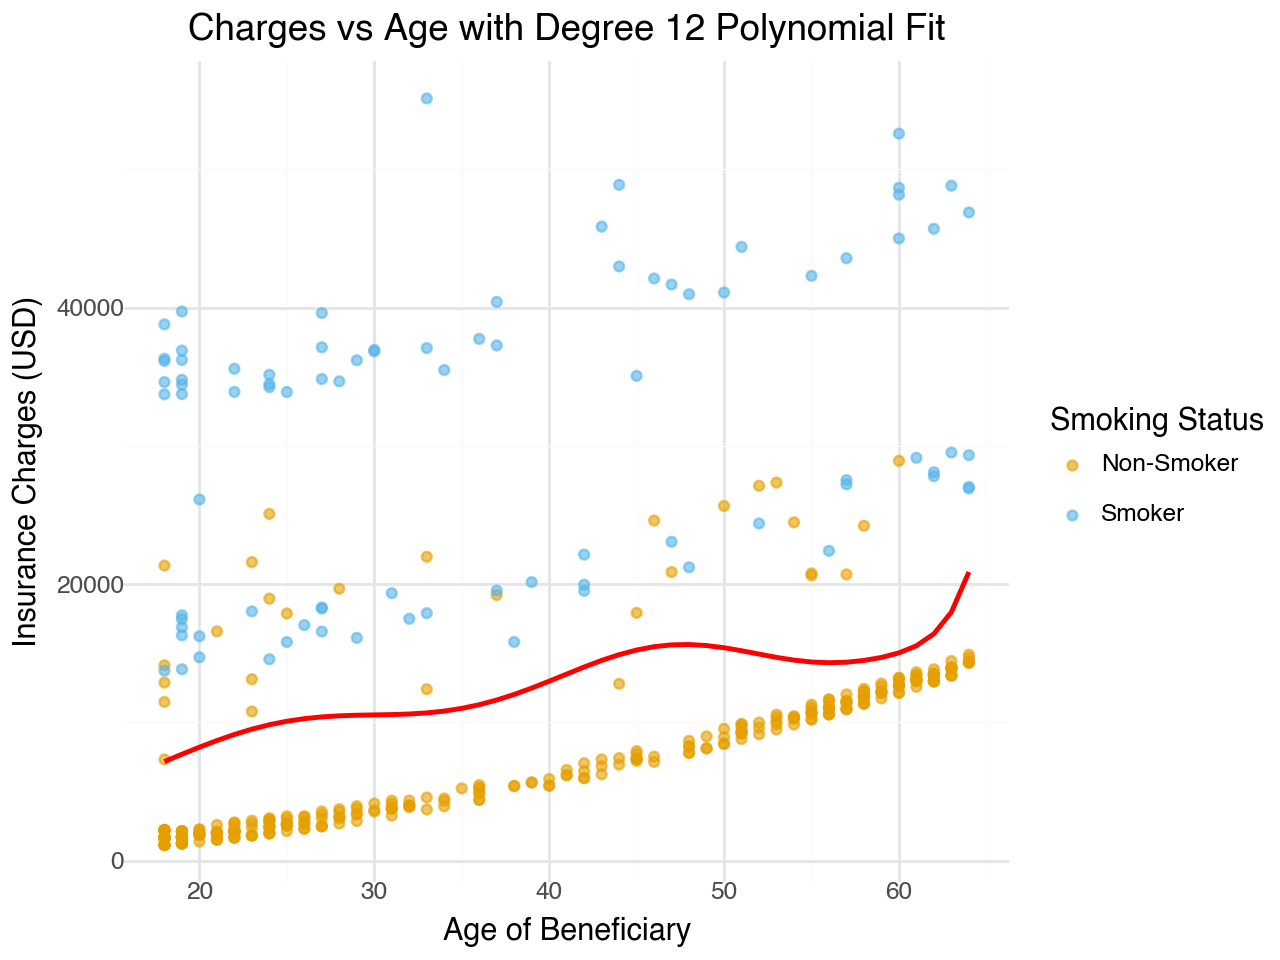

In [35]:
# ChatGPT helped revise and clean plot code
# Plot 1: Charges vs Age colored by smoker status
plot1 = (
    ggplot(df, aes(x='age', y='charges', color='smoker_yes')) +
    geom_point(alpha=0.6) +
    scale_color_manual(values=["#E69F00", "#56B4E9"], labels=["Non-Smoker", "Smoker"]) +
    labs(
        title="Insurance Charges by Age and Smoking Status",
        x="Age of Beneficiary",
        y="Insurance Charges (USD)",
        color="Smoking Status"
    ) +
    theme_minimal()
)

# Plot 2: Charges vs BMI colored by gender
plot2 = (
    ggplot(df, aes(x='bmi', y='charges', color='sex_male')) +
    geom_point(alpha=0.6) +
    scale_color_manual(values=["#0072B2", "#D55E00"], labels=["Female", "Male"]) +
    labs(
        title="Insurance Charges by BMI and Gender",
        x="Body Mass Index (BMI)",
        y="Insurance Charges (USD)",
        color="Gender"
    ) +
    theme_minimal()
)

# Plot 3: Charges by Smoking Status colored by gender
plot3 = (
    ggplot(df, aes(x='smoker_yes', y='charges', fill='sex_male')) +
    geom_boxplot(alpha=0.7) +
    scale_fill_manual(values=["#0072B2", "#D55E00"], labels=["Female", "Male"]) +
    labs(
        title="Insurance Charges by Smoking Status and Gender",
        x="Smoking Status",
        y="Insurance Charges (USD)",
        fill="Gender"
    ) +
    theme_minimal()
)

plot1.show()
plot2.show()
plot3.show()

Part Two: Simple Linear Models

In [36]:
# ChatGPT helped write base code below
# Convert boolean columns to integers
df[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']] = df[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']].astype(int)

# Define target variable
y = df['charges']

# Model 1: Age Only
X_age = df[['age']]
X_train_age, X_test_age, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=42)
lr_age = LinearRegression()
lr_age.fit(X_train_age, y_train)
y_pred_age = lr_age.predict(X_test_age)

# Model Evaluation for Age Only
mse_age = mean_squared_error(y_test, y_pred_age)
r2_age = r2_score(y_test, y_pred_age)

# Model 2: Age and Sex
X_age_sex = df[['age', 'sex_male']]
X_train_age_sex, X_test_age_sex, y_train, y_test = train_test_split(X_age_sex, y, test_size=0.2, random_state=42)
lr_age_sex = LinearRegression()
lr_age_sex.fit(X_train_age_sex, y_train)
y_pred_age_sex = lr_age_sex.predict(X_test_age_sex)

# Model Evaluation for Age and Sex
mse_age_sex = mean_squared_error(y_test, y_pred_age_sex)
r2_age_sex = r2_score(y_test, y_pred_age_sex)

# Model 3: Age and Smoker
X_age_smoker = df[['age', 'smoker_yes']]
X_train_age_smoker, X_test_age_smoker, y_train, y_test = train_test_split(X_age_smoker, y, test_size=0.2, random_state=42)
lr_age_smoker = LinearRegression()
lr_age_smoker.fit(X_train_age_smoker, y_train)
y_pred_age_smoker = lr_age_smoker.predict(X_test_age_smoker)

# Model Evaluation for Age and Smoker
mse_age_smoker = mean_squared_error(y_test, y_pred_age_smoker)
r2_age_smoker = r2_score(y_test, y_pred_age_smoker)

# Display results
print("Model 1: Age Only")
print("MSE:", mse_age, "R-squared:", r2_age)

print("\nModel 2: Age and Sex")
print("MSE:", mse_age_sex, "R-squared:", r2_age_sex)

print("\nModel 3: Age and Smoker")
print("MSE:", mse_age_smoker, "R-squared:", r2_age_smoker)

Model 1: Age Only
MSE: 142622113.21897224 R-squared: 0.13912661773062862

Model 2: Age and Sex
MSE: 144268293.45210543 R-squared: 0.1291902010478485

Model 3: Age and Smoker
MSE: 39487916.45866688 R-squared: 0.7616491900638807
Model 1: Age Only
MSE: 142622113.21897224 R-squared: 0.13912661773062862

Model 2: Age and Sex
MSE: 144268293.45210543 R-squared: 0.1291902010478485

Model 3: Age and Smoker
MSE: 39487916.45866688 R-squared: 0.7616491900638807


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


For Model 1:

The R-squared value of 0.139 indicates that age alone explains about 13.9% of the variability in insurance charges. This low R-squared suggests that age is not a strong predictor on its own, as it leaves a substantial amount of unexplained variance in the charges. The high MSE further confirms that the model's predictions are not very close to the actual charges.

The linear model for Model 1 can be expressed as:

charges = 𝛽0 + 𝛽1 × age

Intercept (𝛽0): This is the baseline insurance charge when age is zero. While age zero isn't realistic for this context, the intercept serves as the starting point for the model.

Age Coefficient (𝛽1): The coefficient for age indicates the expected change in insurance charges for each additional year of age. For example, if β1 is 250, then every additional year would increase the expected charges by $250, holding all else constant.

Since the model only includes age, it’s limited in capturing the full complexity of healthcare costs, as many other factors (like smoking, BMI, and region) significantly influence medical expenses.

Comparison of Model 2 and Model 3

Model 2: Age and Sex

MSE: 144,268,293.45

R-squared: 0.129

Model 3: Age and Smoker

MSE: 39,487,916.46

R-squared: 0.762

Model Fit Comparison: 

Model 3, which includes age and smoking status, clearly fits the data better than Model 2. The MSE for Model 3 is significantly lower than that of Model 2, indicating that the predictions are much closer to the actual insurance charges. Moreover, the R-squared of 0.762 for Model 3 is substantially higher than Model 2’s R-squared of 0.129. This means that Model 3 explains 76.2% of the variance in charges, compared to only 12.9% in Model 2.

The substantial improvement in fit with Model 3 highlights the impact of smoking on healthcare costs. Smoking status is a known risk factor for higher medical expenses, as it correlates with numerous health conditions that require more frequent and costly medical interventions. Therefore, including smoking status (as in Model 3) captures a major contributor to the variability in charges, which is why Model 3 outperforms Model 2.

Model 3 (Age and Smoker) is the better fit, as evidenced by its much lower MSE and higher R-squared. It suggests that smoking status, alongside age, is a critical predictor for insurance charges, capturing more variance and providing better predictive accuracy than age and sex alone.

Part Three: Multiple Linear Models

In [37]:
# ChatGPT helped write base code below
# Define predictors
X_age_bmi = df[['age', 'bmi']]
X_train, X_test, y_train, y_test = train_test_split(X_age_bmi, y, test_size=0.2, random_state=42)

# Train the model
lr_age_bmi = LinearRegression()
lr_age_bmi.fit(X_train, y_train)

# Predictions and evaluation
y_pred_age_bmi = lr_age_bmi.predict(X_test)
mse_age_bmi = mean_squared_error(y_test, y_pred_age_bmi)
r2_age_bmi = r2_score(y_test, y_pred_age_bmi)

print("Model with Age and BMI")
print("MSE:", mse_age_bmi)
print("R-squared:", r2_age_bmi)


Model with Age and BMI
MSE: 134836454.703241
R-squared: 0.1861211968204881
Model with Age and BMI
MSE: 134836454.703241
R-squared: 0.1861211968204881


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [38]:
# ChatGPT helped write base code below
# Polynomial features for age^2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_age_squared = poly.fit_transform(df[['age']])
X_train, X_test, y_train, y_test = train_test_split(X_age_squared, y, test_size=0.2, random_state=42)

# Train the model
lr_age_squared = LinearRegression()
lr_age_squared.fit(X_train, y_train)

# Predictions and evaluation
y_pred_age_squared = lr_age_squared.predict(X_test)
mse_age_squared = mean_squared_error(y_test, y_pred_age_squared)
r2_age_squared = r2_score(y_test, y_pred_age_squared)

print("Model with Age and Age^2")
print("MSE:", mse_age_squared)
print("R-squared:", r2_age_squared)


Model with Age and Age^2
MSE: 142864273.12378797
R-squared: 0.13766492983662948
Model with Age and Age^2
MSE: 142864273.12378797
R-squared: 0.13766492983662948


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [39]:
# ChatGPT helped write base code below
# Polynomial features for degree 4
poly = PolynomialFeatures(degree=4, include_bias=False)
X_age_degree4 = poly.fit_transform(df[['age']])
X_train, X_test, y_train, y_test = train_test_split(X_age_degree4, y, test_size=0.2, random_state=42)

# Train the model
lr_age_degree4 = LinearRegression()
lr_age_degree4.fit(X_train, y_train)

# Predictions and evaluation
y_pred_age_degree4 = lr_age_degree4.predict(X_test)
mse_age_degree4 = mean_squared_error(y_test, y_pred_age_degree4)
r2_age_degree4 = r2_score(y_test, y_pred_age_degree4)

print("Polynomial Model of Degree 4")
print("MSE:", mse_age_degree4)
print("R-squared:", r2_age_degree4)


Polynomial Model of Degree 4
MSE: 139930602.33798158
R-squared: 0.15537269642934903
Polynomial Model of Degree 4
MSE: 139930602.33798158
R-squared: 0.15537269642934903


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [40]:
# ChatGPT helped write base code below
# Polynomial features for degree 12
poly = PolynomialFeatures(degree=12, include_bias=False)
X_age_degree12 = poly.fit_transform(df[['age']])
X_train, X_test, y_train, y_test = train_test_split(X_age_degree12, y, test_size=0.2, random_state=42)

# Train the model
lr_age_degree12 = LinearRegression()
lr_age_degree12.fit(X_train, y_train)

# Predictions and evaluation
y_pred_age_degree12 = lr_age_degree12.predict(X_test)
mse_age_degree12 = mean_squared_error(y_test, y_pred_age_degree12)
r2_age_degree12 = r2_score(y_test, y_pred_age_degree12)

print("Polynomial Model of Degree 12")
print("MSE:", mse_age_degree12)
print("R-squared:", r2_age_degree12)


Polynomial Model of Degree 12
MSE: 145314358.64989862
R-squared: 0.12287610525601367
Polynomial Model of Degree 12
MSE: 145314358.64989862
R-squared: 0.12287610525601367


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


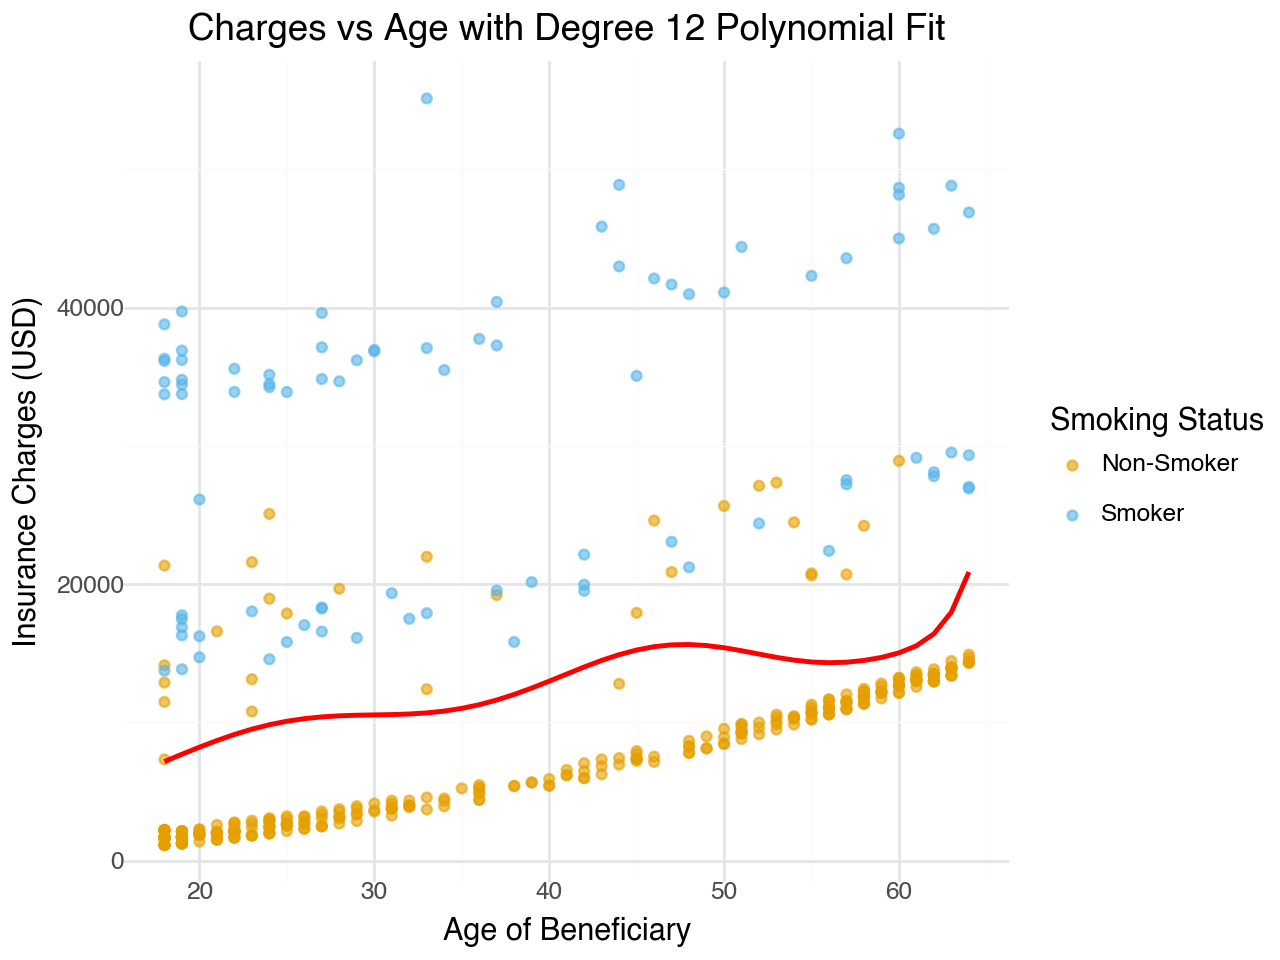

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [41]:
# ChatGPT helped write base code below
# Prepare data for plotting
df_plot = df[['age', 'charges', 'smoker_yes']].copy()
df_plot['predictions'] = lr_age_degree12.predict(poly.fit_transform(df[['age']]))

# Convert smoker_yes to a categorical type
df_plot['smoker_yes'] = df_plot['smoker_yes'].astype('category')

# Plot using df_plot to access 'predictions'
plot = (
    ggplot(df_plot, aes(x='age', y='charges', color='smoker_yes')) +  # Use df_plot here
    geom_point(alpha=0.6) +
    scale_color_manual(values=["#E69F00", "#56B4E9"], labels=["Non-Smoker", "Smoker"]) +
    geom_line(aes(y='predictions'), color='red', size=1) +  # Now this should work
    labs(
        title="Charges vs Age with Degree 12 Polynomial Fit",
        x="Age of Beneficiary",
        y="Insurance Charges (USD)",
        color="Smoking Status"
    ) +
    theme_minimal()
)

plot.show()

Part Four: New data

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


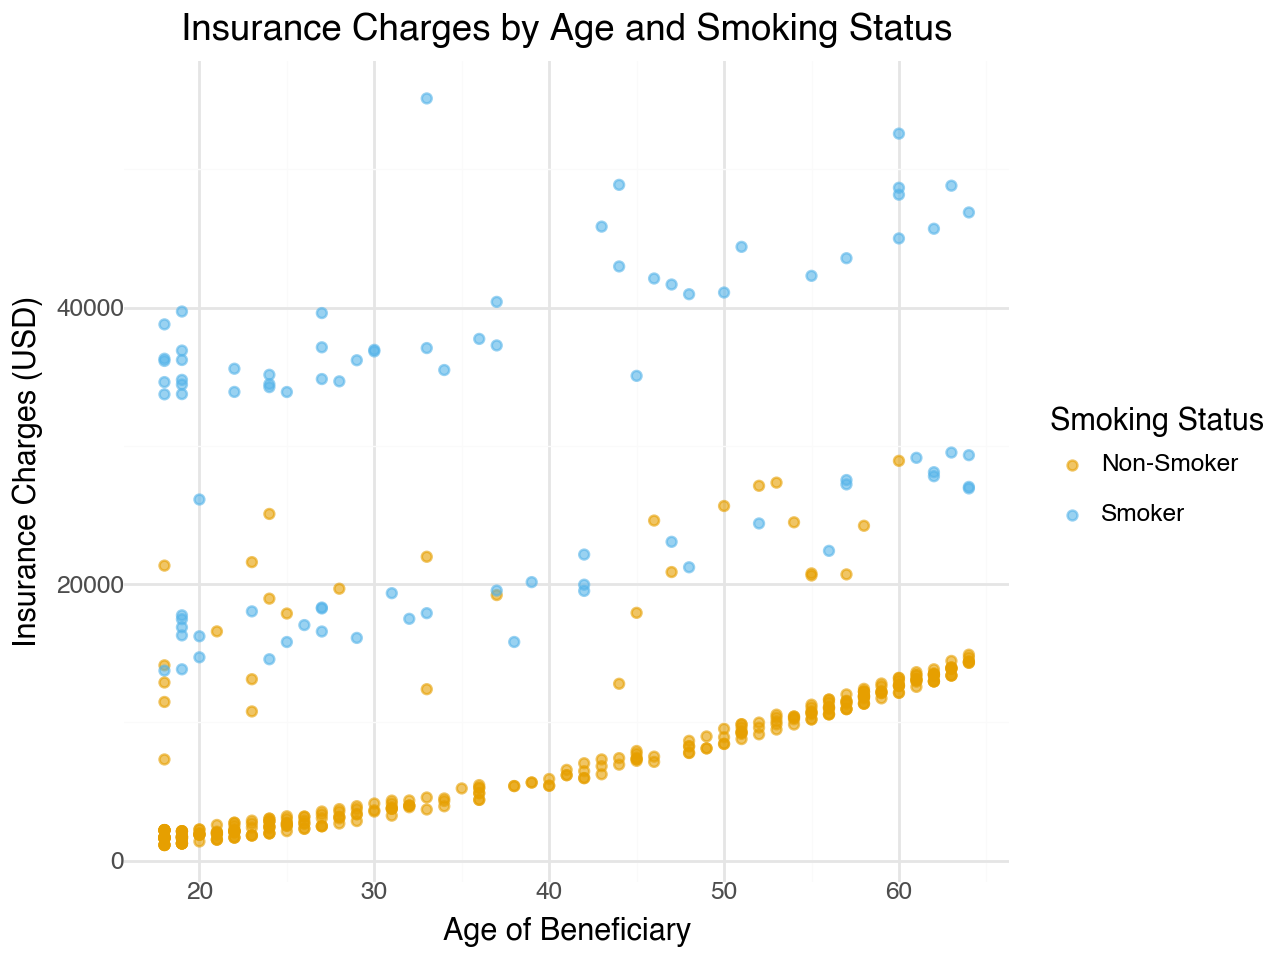

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [42]:
df2 = pd.read_csv('/Users/avanti/OneDrive/MASTERS/GSB544-Computing and Machine Learning/Labs/Lab Data/insurance_costs_2.csv')

# Drop rows with missing values
df2 = df.dropna()

# Remove duplicate rows
df2 = df2.drop_duplicates()

# Display the first few rows of the cleaned dataset
df2.head()

df['smoker_yes'] = df['smoker_yes'].astype('category')
df2['smoker_yes'] = df2['smoker_yes'].astype('category')

{'Model 1: age': np.float64(126940631.18018842),
 'Model 2: age + bmi': np.float64(123981357.75633557),
 'Model 3: age + bmi + smoker_yes': np.float64(30880456.542793643),
 'Model 4: (age + bmi):smoker_yes': np.float64(20821522.112804156),
 'Model 5: (age + bmi)*smoker_yes': np.float64(18715794.595526412)}

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


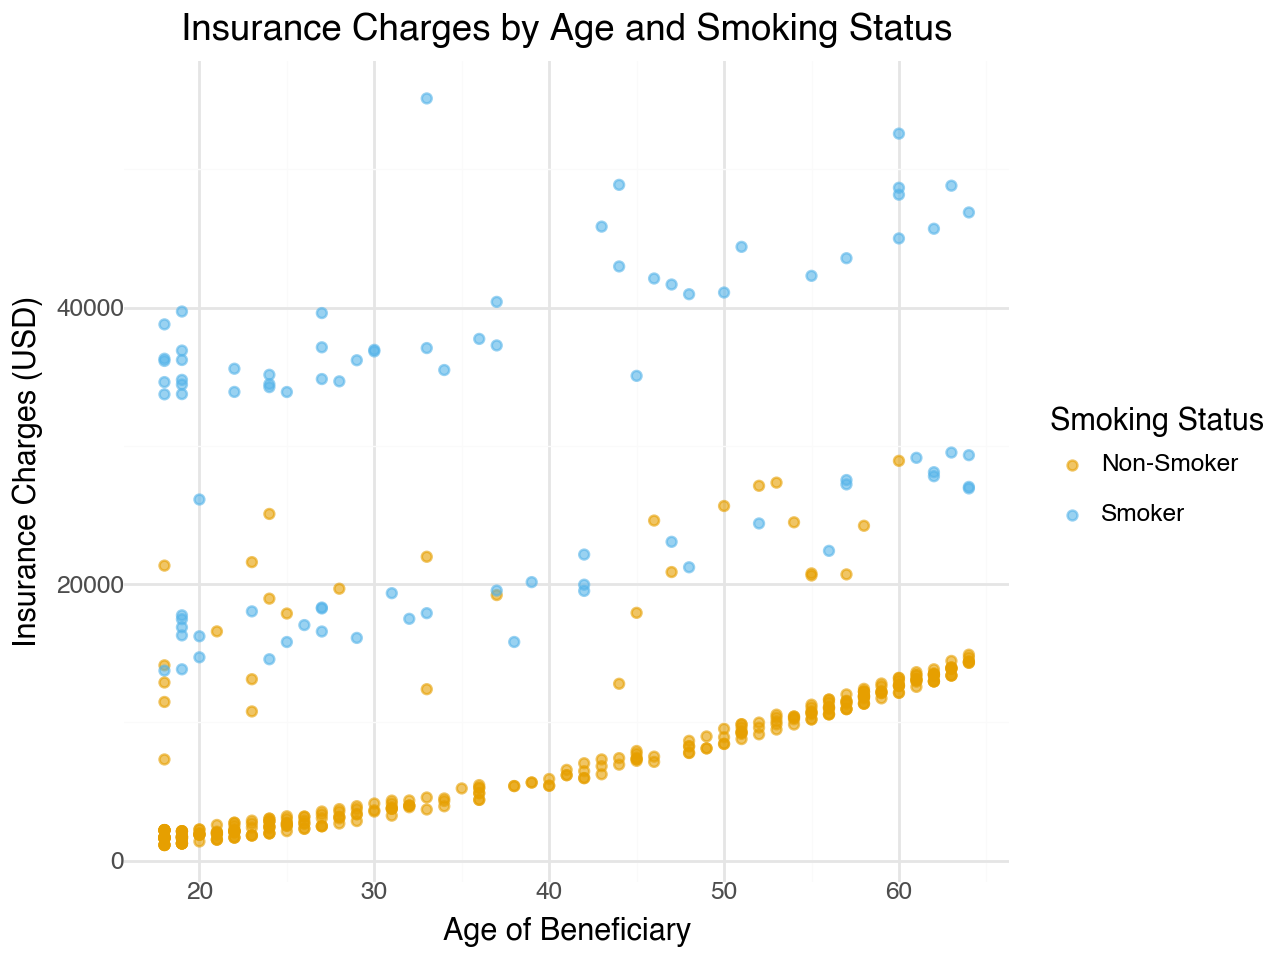

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [43]:
# ChatGPT helped write base code below
# List to store MSE for each model
mse_values = {}

# Model 1: Only age as a predictor
model1 = smf.ols('charges ~ age', data=df).fit()
pred1 = model1.predict(df2)
mse_values['Model 1: age'] = mean_squared_error(df2['charges'], pred1)

# Model 2: age and bmi as predictors
model2 = smf.ols('charges ~ age + bmi', data=df).fit()
pred2 = model2.predict(df2)
mse_values['Model 2: age + bmi'] = mean_squared_error(df2['charges'], pred2)

# Model 3: age, bmi, and smoker as predictors (no interaction terms)
model3 = smf.ols('charges ~ age + bmi + smoker_yes', data=df).fit()
pred3 = model3.predict(df2)
mse_values['Model 3: age + bmi + smoker_yes'] = mean_squared_error(df2['charges'], pred3)

# Model 4: age and bmi with interaction terms with smoker
model4 = smf.ols('charges ~ (age + bmi):smoker_yes', data=df).fit()
pred4 = model4.predict(df2)
mse_values['Model 4: (age + bmi):smoker_yes'] = mean_squared_error(df2['charges'], pred4)

# Model 5: age, bmi, and smoker as predictors with interaction term
model5 = smf.ols('charges ~ (age + bmi)*smoker_yes', data=df).fit()
pred5 = model5.predict(df2)
mse_values['Model 5: (age + bmi)*smoker_yes'] = mean_squared_error(df2['charges'], pred5)

# Display MSE for each model
mse_values


Best model is Model 5: (age + bmi)*smoker_yes with an MSE of 18715794.595526412
Best model is Model 5: (age + bmi)*smoker_yes with an MSE of 18715794.595526412


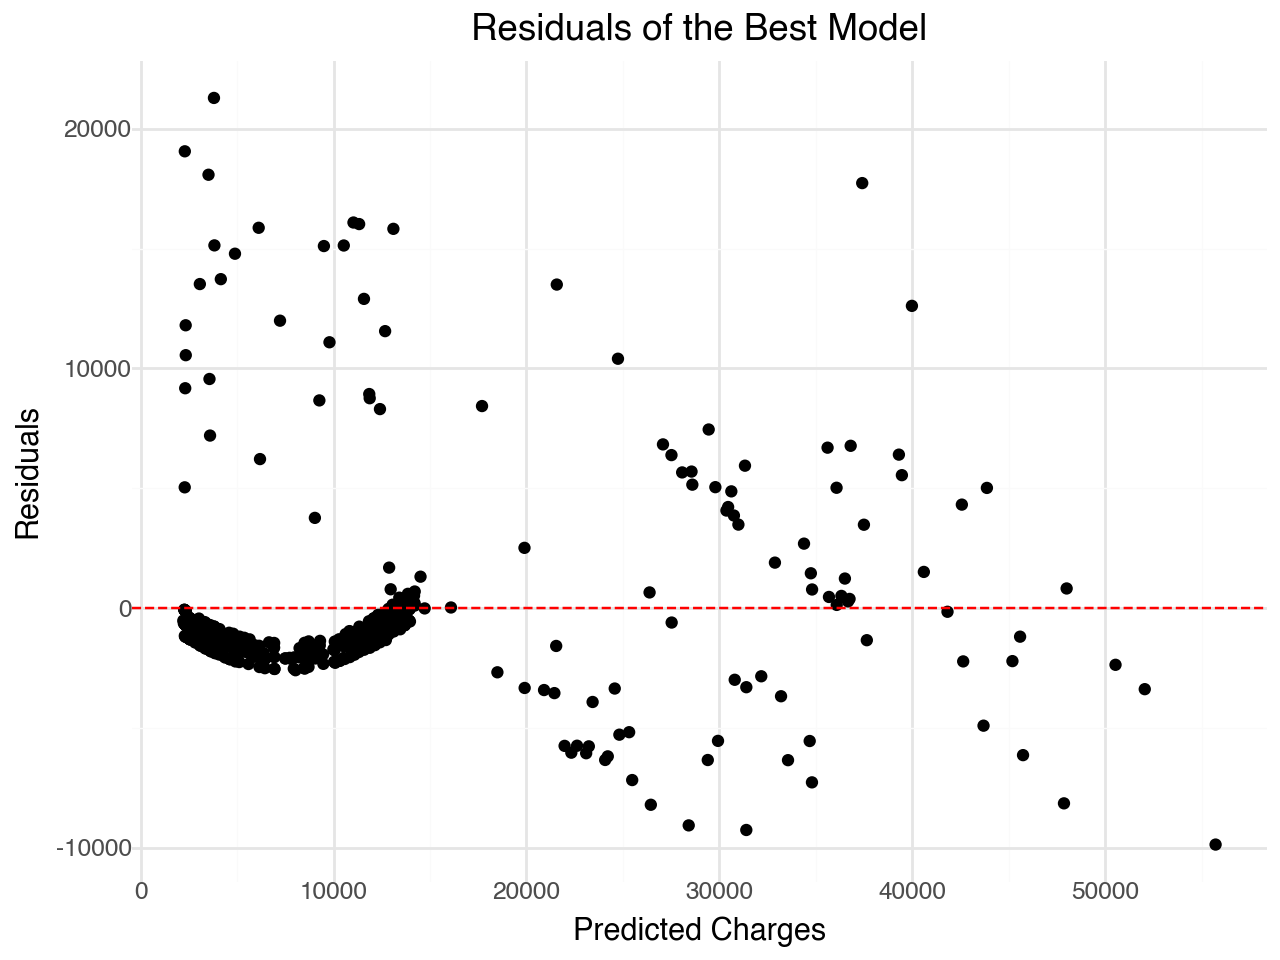

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


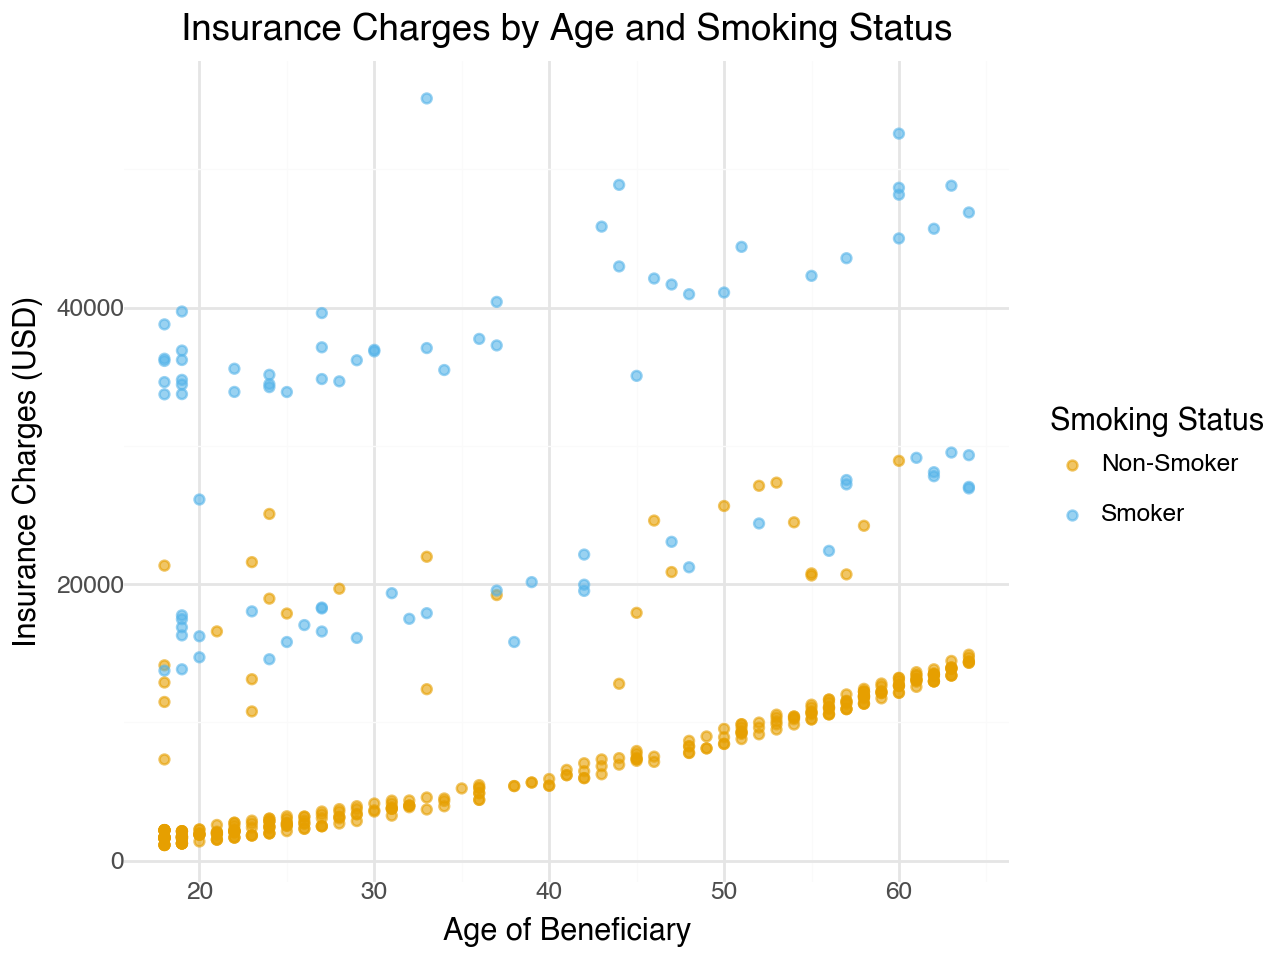

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [44]:
# ChatGPT helped write base code below
# Dictionary to store models by name
models = {
    'Model 1: age': model1,
    'Model 2: age + bmi': model2,
    'Model 3: age + bmi + smoker_yes': model3,
    'Model 4: (age + bmi):smoker_yes': model4,
    'Model 5: (age + bmi)*smoker_yes': model5
}

# Identify the best model based on MSE
best_model_name = min(mse_values, key=mse_values.get)
best_mse = mse_values[best_model_name]
print(f"Best model is {best_model_name} with an MSE of {best_mse}")

# Retrieve the best model from the dictionary
best_model = models[best_model_name]
pred_best = best_model.predict(df2)
residuals = df2['charges'] - pred_best
df2['predicted_charges'] = pred_best
df2['residuals'] = residuals

# Plot residuals using plotnine
(
    ggplot(df2, aes(x='predicted_charges', y='residuals'))
    + geom_point()
    + geom_hline(yintercept=0, color='red', linetype='dashed')
    + labs(title="Residuals of the Best Model", x="Predicted Charges", y="Residuals")
    + theme_minimal()
)


Part 5: Full Exploration

Full exploration model MSE: 18571891.352351163
Full exploration model MSE: 18571891.352351163


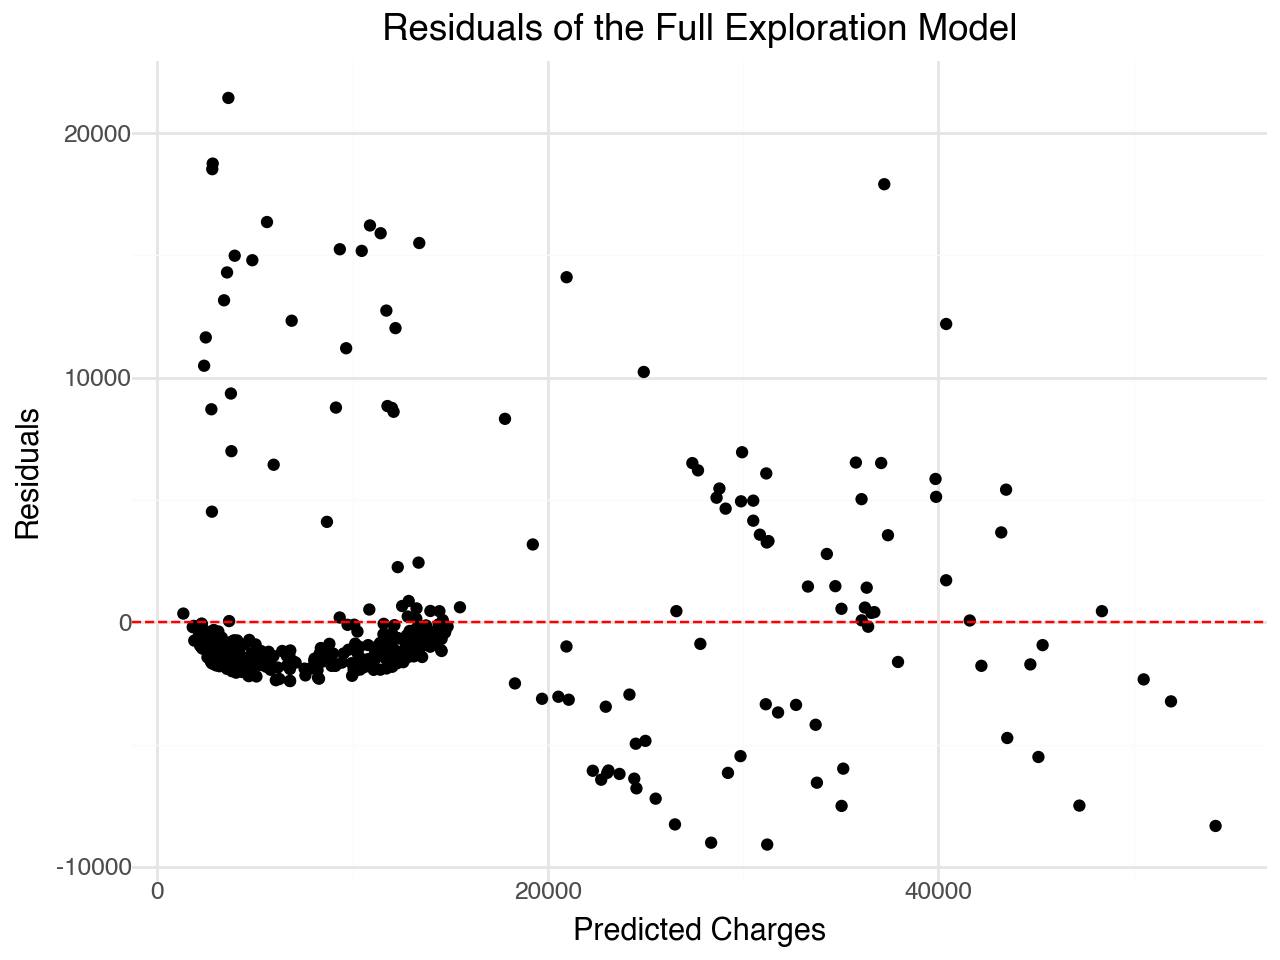

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


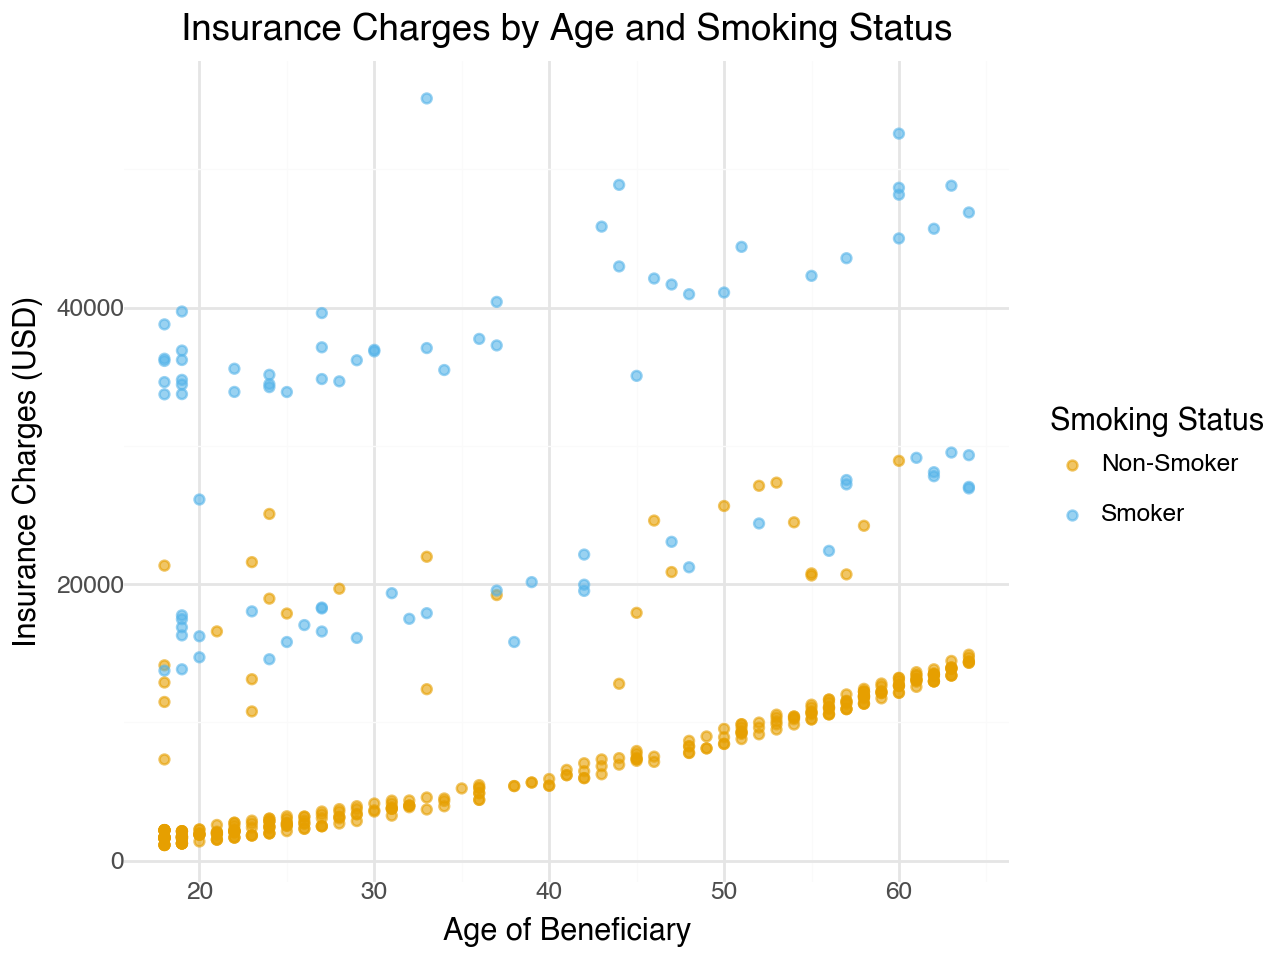

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [45]:
# ChatGPT helped write base code below
# Model with quadratic terms of age and bmi, including smoker as predictor
model_poly = smf.ols('charges ~ age + bmi + smoker_yes + I(age**2) + I(bmi**2) + age:smoker_yes + bmi:smoker_yes', data=df).fit()
pred_poly = model_poly.predict(df2)
mse_poly = mean_squared_error(df2['charges'], pred_poly)
print(f"Full exploration model MSE: {mse_poly}")

# Add predictions and residuals to df2
df2['predicted_poly'] = pred_poly
df2['residuals_poly'] = df2['charges'] - pred_poly

# Plot residuals of the full exploration model
(
    ggplot(df2, aes(x='predicted_poly', y='residuals_poly'))
    + geom_point()
    + geom_hline(yintercept=0, color='red', linetype='dashed')
    + labs(title="Residuals of the Full Exploration Model", x="Predicted Charges", y="Residuals")
    + theme_minimal()
)
